# Mini-tutorial Machine Learning with Iris dataset

*In this Jupyter notebook you will apply a simple Machine Learning algorithm. You will train and evaluate a classifier, using scikit-learn. We will use the Iris flower dataset. The natural task to solve using this dataset is to classify the Iris species knowing the sepal and petal measures.*

*The analysis part (see section 3 of this notebook) is large taken from the book "Machine Learning in Python with Scikit" written by Raúl Garreta & Guillermo Moncecchi. The code is adapted for Python 3.6 and the usage of pandas.* 

Start by importing the Python libraries. 
Show the versions we will be using (in case you have problems running the notebooks). Also enable plotting in the notebook.

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

numpy version: 1.11.3
pandas version: 0.19.2
scikit-learn version: 0.18.1
matplotlib version: 2.0.0


## 1 - Load Iris dataset

The first thing you have to do is load the Iris dataset in this notebook. Use the following URL that points to this dataset and include it as a dataframe object.

In [24]:
df_iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

Show the first 5 rows (a.k.a. observations) and the last 10 rows of the Iris dataset. You can use the dataframe ``head`` and ``tail`` method for this. Also have a look at a row somewhere in the middle.

In [25]:
df_iris.head(5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Add meaningful column names.

In [26]:
df_iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

In [27]:
df_iris.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
df_iris.tail(3)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [29]:
df_iris.shape

(150, 5)

## 2 - Prepare Iris Dataset

Add a column **Label** to your dataframe with 0 for *Iris setosa*, 1 for *Iris versicolor*, and 2 for *Iris virginica*.

In [30]:
df_iris['Label'] = df_iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
df_iris

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


In order to get some feeling for the data make a boxplot (with 4 subplots, i.e. for each of the features) of an Iris species.

Note: In descriptive statistics, a [boxplot](https://en.wikipedia.org/wiki/Box_plot) is a convenient way of graphically depicting groups of numerical data through their quartiles. Boxplots may also have lines (whiskers) extending vertically from the boxes indicating variability outside the upper and lower quartiles. Outliers may be plotted as individual points. 

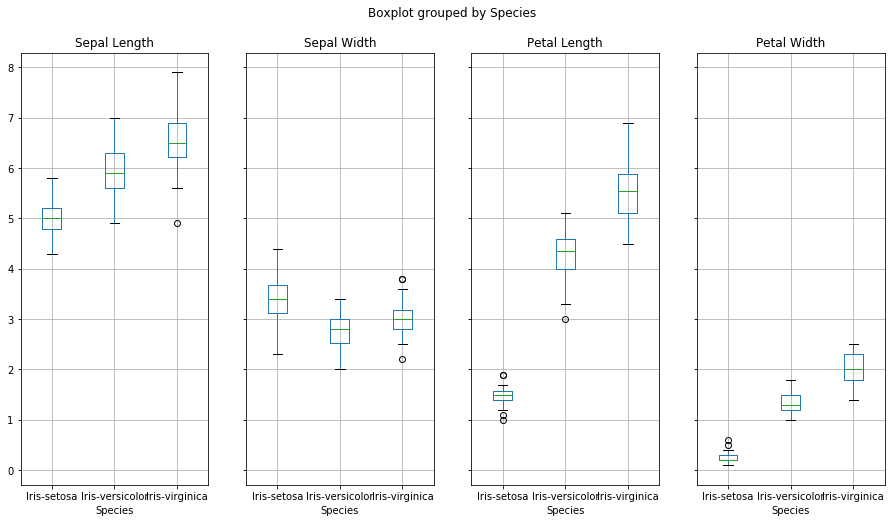

In [31]:
features = tuple(df_iris.columns[:4].values)
df_iris.boxplot(column=features, by='Species', figsize=(15,8), layout=(1,4));       

## 3 - Analysis with Linear Model

Our first step will be to separate the dataset into to separate sets, using 75% of the instances for training our classifier, and the remaining 25% for evaluating it. In this case, we take only two features, sepal length and width.

In [32]:
# Get from the dataframe only the first two features, it is common practice to call this X (the independent variables)
X = df_iris[['Sepal Length','Sepal Width']] 

# Get from the dataframe the just created label variable, usually called y (the target class that you want to predict)
y = df_iris['Label']

### 3.1 - Normalize

In [33]:
from sklearn.preprocessing import StandardScaler

# Standarize the features
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

### 3.2 - Split in Train and Test Set

In [35]:
from sklearn.model_selection import train_test_split

# Split the dataset into a training and a testing set; test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(112, 2) (112,)


Let's plot the training data. X_train has become a NumPy array after transformation. This means we've lost the column names. y_train, however, is stil a pandas series. Because we can't use a pandas series as a Boolean mask for a NumPy array, we have to extract the NumPy array from the pandas Series. We use `pandas.Series.as_matrix()` to convert a Series to a NumPy array

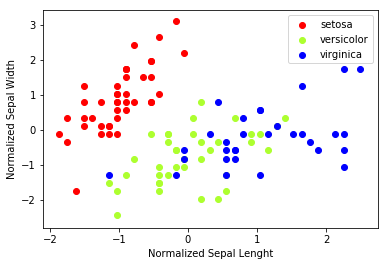

In [36]:
colors = ('red', 'greenyellow', 'blue')
for i in range(len(colors)):
    x1s = X_train[:, 0][y_train.as_matrix() == i]
    x2s = X_train[:, 1][y_train.as_matrix() == i]
    plt.scatter(x1s, x2s, c=colors[i])

plt.legend(['setosa', 'versicolor', 'virginica'])   # maintain order from dataset preparation!
plt.xlabel('Normalized Sepal Lenght')
plt.ylabel('Normalized Sepal Width');

### 3.3 - Compute Decision Boundaries (Train Set)

Note that setosa is easily separable from the other two classes, while versicolor and virginica are pretty messed ... 

To implement linear classification, we will use the SGDClassifier from scikit-learn. SGD stands for Stochastic Gradient Descent, a popular numerical procedure to find the local minimum of a function (in this case, the loss function, which measures how far every instance is from our boundary). The algorithm will learn the coefficients of the hyperplane by minimizing the loss function. In precise in-and-outs of this method is beyond the scope of this lesson, click [here](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) for more information.

Let's fit this linear classification method to our training data, and show the computed hyperplanes (a.k.a. decision boundaries):

Note that target class labeled 0 is linearly separable, while class 1 and class 2 are not!!

In [37]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')

# Fit (= train) the classifier
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 3.4 - Evaluate Performance (with Test Set)

Now, the end of the story: suppose that we have a new flower with a sepal width of 4.7 and a sepal length of 3.1, and we want to predict its class. We just have to apply our brand new classifier to it (after normalizing!). The predict method takes an array of instances (in this case, with just one element) and returns a list of predicted classes:

If our classifier is right, this Iris flower is a setosa.

In [38]:
print(scaler.transform([[4.7, 3.1]]))
print(clf.predict(scaler.transform([[4.7, 3.1]]))[0])

[[-1.38535265  0.10644536]]
0


Try some other values for yourself. Does the prediction make sense?

OK, that works fine. Now let's see how good our classifier is on our test set.

In [39]:
from sklearn import metrics

y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.684210526316


Examine which test samples go wrong. Create a new dataframe of the test samples, and the corresponding labels and predictions.



In [40]:
df_fulltest = pd.DataFrame(X_test, columns=['Sepal Length', 'Sepal Width'])

df_ytest = pd.Series(y_test).reset_index()

# Extend dataframe with columns label and prediction (and even index in the original set)
df_fulltest['Label'] = df_ytest['Label']
df_fulltest['Prediction'] = pd.Series(y_pred)
df_fulltest['Orginal Index'] = df_ytest['index']

df_fulltest

,Sepal Length,Sepal Width,Label,Prediction,Orginal Index
0,-0.173674,-0.356361,1,1,96
1,1.038005,0.106445,1,2,65
2,-1.385353,0.337848,0,0,29
3,0.795669,-0.587764,1,2,54
4,0.310998,-1.050569,2,1,134
5,0.553333,0.569251,2,2,100
6,-1.264185,0.800654,0,0,24
7,-0.900681,1.032057,0,0,17
8,0.674501,0.106445,2,2,137
9,1.280340,0.337848,2,2,120


## 4 - Do It Yourself Analysis

1. What happens if you do the above analysis with another training set? Show and explain.

2. What happens if you apply a non-linear model?

3. Pick 3 features instead of 2 (motivate your choice) and repeat the above analysis. Is the prediction power better or worse (does the accuracy improve)? 

Optional: 

4. Leave out the normalization step and adapt your code accordingly. Does the accuracy change without normalization. Can you explain why?

In [ ]:
# Get from the dataframe only the first 3 features, it is common practice to call this X (the independent variables)
X = df_iris[['Sepal Length','Sepal Width', 'Petal Length']] 

# Get from the dataframe the just created label variable, usually called y (the target class that you want to predict)
y = df_iris['Label']

# Normalize the features
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Split the dataset into a training and a testing set; test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# Create classifier object
clf = SVC(kernel='linear')

# Fit (= train) the classifier with train data
clf.fit(X_train, y_train)

# Predictions on test data
y_pred = clf.predict(X_test)

# How good is it (compare predictions with labels)
print(metrics.accuracy_score(y_test, y_pred))